# Pyber Analysis Trends

### First observation: 
Urban City Type has the largest amount of total drivers, total cities and total fares compared to "Suburban" and "Rural" area city types.

### Second Observation: 
On average, fares for Rural riders are higher than both Urban and Suburban individual fares. This might be the result of more mileage or time to get to the rider's destination.

### Third Observation:
The percentage of fares and the percentage of rides are proportioned almost equally in the pie charts. The driver percentage goes up significantly in urban areas. More drivers are working for lower fares, but with a much higher volume of rides.

In [73]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_and_ride_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
city_and_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

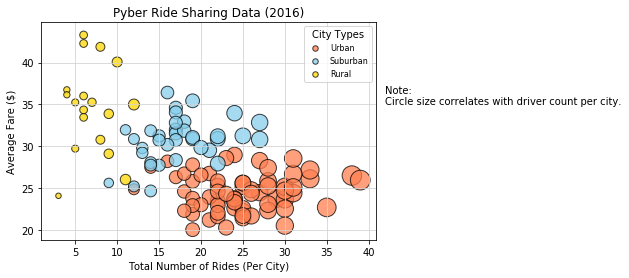

In [79]:
# Obtain the x and y coordinates for each of the three city types
Urban = city_and_ride_data[(city_and_ride_data.type == "Urban")]
Suburban = city_and_ride_data[(city_and_ride_data.type == "Suburban")]
Rural = city_and_ride_data[(city_and_ride_data.type == "Rural")]

Urban_rides_per_city = Urban.groupby([city_and_ride_data.city]).count()["ride_id"]
Urban_average_fare = Urban.groupby([city_and_ride_data.city]).mean()["fare"]

Suburban_rides_per_city = Suburban.groupby([city_and_ride_data.city]).count()["ride_id"]
Suburban_average_fare = Suburban.groupby([city_and_ride_data.city]).mean()["fare"]

Rural_rides_per_city = Rural.groupby([city_and_ride_data.city]).count()["ride_id"]
Rural_average_fare = Rural.groupby([city_and_ride_data.city]).mean()["fare"]

# Build the scatter plots for each city types
plt.scatter(Urban_rides_per_city, Urban_average_fare, label = "Urban", s=Urban_rides_per_city*10, marker="o", facecolors=["coral"], edgecolors="black", alpha = 0.75)
plt.scatter(Suburban_rides_per_city, Suburban_average_fare, label = "Suburban",s=Suburban_rides_per_city*10, marker="o", facecolors=["skyblue"], edgecolors="black", alpha = 0.75)
plt.scatter(Rural_rides_per_city, Rural_average_fare, label = "Rural", s=Rural_rides_per_city*10, marker="o", facecolors=["gold"], edgecolors="black", alpha = 0.75)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best")

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)
plt.grid(c="lightgrey")  

# Save Figure
plt.savefig("../Images/Ride Sharing.png", bbox_inches="tight")

# Show plot
plt.show()


## Total Fares by City Type

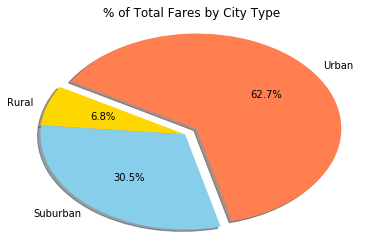

In [80]:
# Calculate Type Percents
Total_rides_per_city_Fare = city_and_ride_data.groupby("type")["fare"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
        
plt.pie(Total_rides_per_city_Fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type") 

# Format plot
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Percentage of Total Fares.png")
plt.show()

## Total Rides by City Type

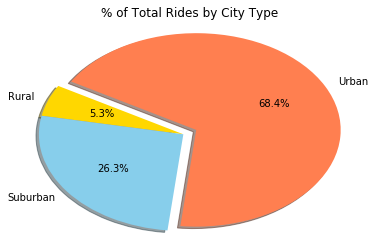

In [81]:
# Calculate Ride Percents
Total_rides_per_city_type = city_and_ride_data.groupby("type")["ride_id"].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]

plt.pie(Total_rides_per_city_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type") 

# Format plot
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Percentage of Total Rides.png")
plt.show()


## Total Drivers by City Type

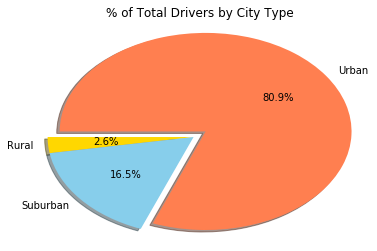

In [82]:
# Calculate Driver Percents
Total_drivers_per_city_type = city_data.groupby("type")["driver_count"].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]

plt.pie(Total_drivers_per_city_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", pctdistance=.6, shadow=True, startangle=180)
plt.title("% of Total Drivers by City Type") 

# Format plot
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Percentage of Total Drivers.png")
plt.show()